# Falling Weight


In [1]:
from day_math import cdft, cdiv, cmag, cph, cadd, cmul, cconj, pi, rad2deg, re_im
from day_rfp import rfp
import matplotlib.pyplot as plt
from copy import deepcopy

def h1_plot(a_f, a_f_title, inp, inp_title, inp_title1, outp, outp_title, outp_title1):
    plt.figure(figsize=(12.8, 9.6)) # width = 12.8 in, height = 9.6 in 
    plotter(a_f, a_f_title, inp, inp_title, inp_title1, 211)
    plotter(a_f, a_f_title, outp, outp_title, outp_title1, 212)
    plt.show()

def plotter(x, xlabel, y, ylabel, title, id):
    pid = plt.subplot(id)
    pid.stem(x, y, label=ylabel, markerfmt=' ', basefmt='-b')
    pid.set_title(title)
    pid.legend(loc="upper right")
    pid.set_xlabel(xlabel)
    pid.set_ylabel(ylabel)

def fzero(eps, z, iz):
    if cmag(z, iz) > eps:
        return re_im(z, iz)
    else:
        return [0, 0]

def pad_zeros(data, N):    
    if len(data) // 2 < N:
        data += [0.0] * (2 * (N - (len(data) // 2)))
    return data

def get_sd(A, B, N):
    cdata = []
    for m in range(N):
        cdata += cmul([2 / N, 0.0], cmul(cconj(A, m), B, 0, m)) 
    return cdata

def bad_coherence(coherence, Fs, N):
    bad_coherence = []
    for i in range(N):
        if cmag(coherence, i) < 0.9:
            bad_coherence.append([i * Fs / N, cmag(coherence, i)])
    if bad_coherence == []:
        return
    else:
        print(bad_coherence)
    return 

def get_wz(h1, a_f, N, n_dof, imin, imax, plot_flag = 0): # h1 is two sided
    a_ampl, a_theta, omega = [], [], []
    for i in range(1, N // 2): # convert to one sided, exclude DC
        a_ampl += [2.0 * cmag(h1, i + N // 2)] 
        a_theta += [cph(0.0, h1, i + N // 2)]
        omega += [2 * pi * (a_f[i + N // 2] - a_f[N//2])]
    amplo, phaseo, omegao, poles, residues = rfp(a_ampl, a_theta , omega, n_dof, imin, imax) # imax max is N // 2 - 2
    if plot_flag == 1:
        h1_plot([a / (pi * 2) for a in omega[imin:imax + 1]], 'Frequency, hz', [ampl / N for ampl in a_ampl[imin: imax + 1]], 'mils/kip', 'experimental FRF', [ampl / N for ampl in amplo], 'mils/kip', 'fitted FRF, dof ' + str(n_dof))
        h1_plot([a / (pi * 2) for a in omega[imin:imax + 1]], 'Frequency, hz', a_theta[imin: imax + 1], 'radians', 'experimental FRF', phaseo, 'radians', 'fitted FRF, dof ' + str(n_dof))
        #plt.stem([a / (pi * 2) for a in omega], a_ampl, markerfmt=' ', basefmt='-b')
        #plt.show()
        #plt.stem([a / (pi * 2) for a in omegao], [ampl / N for ampl in amplo], markerfmt=' ', basefmt='-b')
        #plt.show()
        #plt.stem([a / (pi * 2) for a in omega], a_theta, markerfmt=' ', basefmt='-b')
        #plt.show()
        #plt.stem([a / (pi * 2) for a in omegao], [phaseo[i] if ampl > 1 / N else 0 for i, ampl in enumerate(amplo)], markerfmt=' ', basefmt='-b')
        #plt.show()
    #print('n_dof', n_dof)
    #print('poles', poles)
    #print('residues', residues)
    wz = [0, 0]
    for i in range(len(poles)):
        wz = cadd(wz, cdiv(residues[i], cmul([-1, 0], poles[i]))) 
    return cmag(wz)


Station: 1  Lane: 1  Milepost: 1441.000

Drop # 1  Desired peak force: 36000.000

Time Force Disp1 Disp2 Disp3 Disp4 Disp5 Disp6 Disp7

Impact: 0    Number_of_samples: 878

Station: 1  Lane: 1  Milepost: 1441.000

Drop # 2  Desired peak force: 16000.000

Time Force Disp1 Disp2 Disp3 Disp4 Disp5 Disp6 Disp7

Impact: 0    Number_of_samples: 647

Station: 1  Lane: 1  Milepost: 1441.000

Drop # 3  Desired peak force: 24000.000

Time Force Disp1 Disp2 Disp3 Disp4 Disp5 Disp6 Disp7

Impact: 0    Number_of_samples: 878

Station: 1  Lane: 1  Milepost: 1441.000

Drop # 4  Desired peak force: 36000.000

Time Force Disp1 Disp2 Disp3 Disp4 Disp5 Disp6 Disp7

Impact: 0    Number_of_samples: 878

time_data [0.0, 0.1707, 0.3413, 0.512, 0.6827]
peak force, kips 37.3779 peak_disp1, mils -12.6705 peak response1, mils / kip -0.33898373102822793


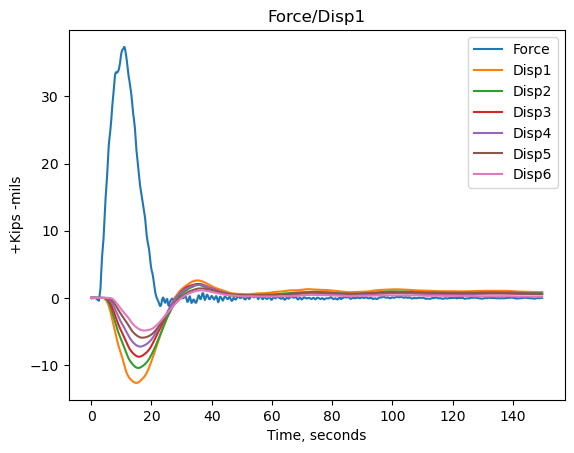

In [2]:
file_input = open("fwd roundup.THY")
while True:
    field_data = file_input.readline()
    if field_data.strip() == '':
        break
    elif field_data.strip().lower().startswith('station'):
        station_data = field_data
        drop_data = file_input.readline()
    elif field_data.strip().lower().startswith('drop'):
        drop_data = field_data
    time_force_disp_1_7_data = file_input.readline()
    print(station_data)
    print(drop_data)
    print(time_force_disp_1_7_data)
    impact_data = file_input.readline()
    print(impact_data)
    n_samples = impact_data.split(':')[-1].strip()
    n_samples = int(n_samples)
    time_data = []
    force_data = []
    disp1_data = [] # center of 12 inch diameter plate
    disp2_data = [] # 12 inch behind
    disp3_data = [] # 24 inch behind
    disp4_data = [] # 36 inch behind
    disp5_data = [] # 48 inch behind
    disp6_data = [] # 60 inch behind
    disp7_data = [] # 12 inch forward
    for i in range(n_samples):
        a_sample = file_input.readline()
        f_sample = [float(a) for a in a_sample.split(' ')]
        time_data.append(f_sample[0])
        force_data += [f_sample[1], 0.0]
        disp1_data += [f_sample[2], 0.0]
        disp2_data += [f_sample[3], 0.0]
        disp3_data += [f_sample[4], 0.0]
        disp4_data += [f_sample[5], 0.0]
        disp5_data += [f_sample[6], 0.0]
        disp6_data += [f_sample[7], 0.0]
        disp7_data += [f_sample[8], 0.0]
    dd = drop_data.split('#')
    if dd[1].strip()[0] != '4': # use drop 4 after 3 seating drops
        continue
    print('time_data', time_data[:5])
    peak_force = max([force_data[i * 2] for i in range(n_samples)])
    peak_disp1 = min([disp1_data[i * 2] for i in range(n_samples)])
    print('peak force, kips', peak_force, 'peak_disp1, mils', peak_disp1,
          'peak response1, mils / kip',  peak_disp1 / peak_force)
    # show station 1, 10, 15 not enough samples, 90
    if station_data[9:11] not in ('1 ', '10', '15', '90'):
        continue
    plt.plot(time_data, [force_data[i * 2] for i in range(n_samples)], label = 'Force')
    plt.plot(time_data, [disp1_data[i * 2] for i in range(n_samples)], label = 'Disp1')
    plt.plot(time_data, [disp2_data[i * 2] for i in range(n_samples)], label = 'Disp2')
    plt.plot(time_data, [disp3_data[i * 2] for i in range(n_samples)], label = 'Disp3')
    plt.plot(time_data, [disp4_data[i * 2] for i in range(n_samples)], label = 'Disp4')
    plt.plot(time_data, [disp5_data[i * 2] for i in range(n_samples)], label = 'Disp5')
    plt.plot(time_data, [disp6_data[i * 2] for i in range(n_samples)], label = 'Disp6')
    plt.title('Force/Disp1')
    plt.legend(loc="upper right")
    plt.xlabel('Time, seconds')
    plt.ylabel('+Kips -mils')    
    plt.show()


In [3]:
    ts = 0.1707
    Fs = round(1.0 / ts)
    N = 1000 # 2000
    step = Fs / N

    a_t = [n * ts for n in range(N)]
    a_f = [m * Fs / N for m in range(N)]   

    force_data = pad_zeros(force_data, N)
    disp1_data = pad_zeros(disp1_data, N)
    disp2_data = pad_zeros(disp2_data, N)
    disp3_data = pad_zeros(disp3_data, N)
    disp4_data = pad_zeros(disp4_data, N)
    disp5_data = pad_zeros(disp5_data, N)
    disp6_data = pad_zeros(disp6_data, N)
      
    print('Calculating dft')
    Force = cdft(force_data)
    Disp1 = cdft(disp1_data)
    Disp2 = cdft(disp2_data)
    Disp3 = cdft(disp3_data)
    Disp4 = cdft(disp4_data)
    Disp5 = cdft(disp5_data)
    Disp6 = cdft(disp6_data)

    new_Force = []
    new_Disp1 = []
    new_Disp2 = []
    new_Disp3 = []
    new_Disp4 = []
    new_Disp5 = []
    new_Disp6 = []

    for m in range(N):
        new_Force += fzero(1 / N, Force, m)
        new_Disp1 += fzero(0.0, Disp1, m)
        new_Disp2 += fzero(0.0, Disp2, m)
        new_Disp3 += fzero(0.0, Disp3, m)
        new_Disp4 += fzero(0.0, Disp4, m)
        new_Disp5 += fzero(0.0, Disp5, m)
        new_Disp6 += fzero(0.0, Disp6, m)
    
    Force = deepcopy(new_Force)
    Disp1 = deepcopy(new_Disp1)
    Disp2 = deepcopy(new_Disp2)
    Disp3 = deepcopy(new_Disp3)
    Disp4 = deepcopy(new_Disp4)
    Disp5 = deepcopy(new_Disp5)
    Disp6 = deepcopy(new_Disp6)

    print('Calculating H1')
    sff = get_sd(Force, Force, N) 
    sfd1 = get_sd(Force, Disp1, N) 
    sfd2 = get_sd(Force, Disp2, N)
    sfd3 = get_sd(Force, Disp3, N)
    sfd4 = get_sd(Force, Disp4, N)
    sfd5 = get_sd(Force, Disp5, N)
    sfd6 = get_sd(Force, Disp6, N)
    h1_1, h1_2, h1_3, h1_4, h1_5, h1_6 = [], [], [], [], [], []
    for m in range(N):
        h1_1 += cdiv(sfd1, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd1, m) > 0 else [0, 0]
        h1_2 += cdiv(sfd2, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd2, m) > 0 else [0, 0]
        h1_3 += cdiv(sfd3, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd3, m) > 0 else [0, 0]
        h1_4 += cdiv(sfd4, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd4, m) > 0 else [0, 0]
        h1_5 += cdiv(sfd5, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd5, m) > 0 else [0, 0]
        h1_6 += cdiv(sfd6, sff, m, m) if cmag(sff, m) > 0 and cmag(sfd6, m) > 0 else [0, 0]
    # two sided
    #plt.stem(a_f, [cmag(h1_1, m) for m in range(N)], markerfmt=' ', basefmt='-b')
    #plt.show()
    #plt.stem(a_f, [rad2deg(cph(1 / N, h1_1, m)) for m in range(N)], markerfmt=' ', basefmt='-b')
    #plt.show()

    # one sided
    N2 = N // 2
    a_frequency = [m * Fs / N for m in range(N2)]

    #plt.stem([a_frequency[m] for m in range(N2)], [cmag(h1_1, 0) / N] + [2.0 * cmag(h1_1, m) / N for m in range(1, N2)], markerfmt=' ', basefmt='-b')
    #plt.show()

    #plt.stem([a_frequency[m] for m in range(N2)], [rad2deg(cph(1 / N, h1_1, 0))] + [rad2deg(cph(1 / N, h1_1, m)) for m in range(1, N2)], markerfmt=' ', basefmt='-b')
    #plt.show()

    print('Calculating H2')
    sd1f = get_sd(Disp1, Force, N) 
    sd1d1 = get_sd(Disp1, Disp1, N) 
    sd2f = get_sd(Disp2, Force, N)
    sd2d2 = get_sd(Disp2, Disp2, N)
    sd3f = get_sd(Disp3, Force, N)
    sd3d3 = get_sd(Disp3, Disp3, N)
    sd4f = get_sd(Disp4, Force, N)
    sd4d4 = get_sd(Disp4, Disp4, N)
    sd5f = get_sd(Disp5, Force, N)
    sd5d5 = get_sd(Disp5, Disp5, N)
    sd6f = get_sd(Disp6, Force, N)
    sd6d6 = get_sd(Disp6, Disp6, N)
    h2_1, h2_2, h2_3, h2_4, h2_5, h2_6 = [], [], [], [], [], []
    for m in range(N):
        
        h2_1 += cdiv(sd1d1, sd1f, m, m) if cmag(sd1f, m) > 0 else [0, 0]
        h2_2 += cdiv(sd2d2, sd2f, m, m) if cmag(sd2f, m) > 0 else [0, 0]
        h2_3 += cdiv(sd3d3, sd3f, m, m) if cmag(sd3f, m) > 0 else [0, 0]
        h2_4 += cdiv(sd4d4, sd4f, m, m) if cmag(sd4f, m) > 0 else [0, 0]
        h2_5 += cdiv(sd5d5, sd5f, m, m) if cmag(sd5f, m) > 0 else [0, 0]
        h2_6 += cdiv(sd6d6, sd6f, m, m) if cmag(sd6f, m) > 0 else [0, 0]

    print('Calculating ordinary coherence')
    coher_1, coher_2, coher_3, coher_4, coher_5, coher_6 = [], [], [], [], [], []
    for m in range(N): 
        coher_1 += cdiv(cmul(sfd1, cconj(sfd1, m), m), cmul(sff, sd1d1, m, m)) if cmag(sff, m) > 0 and cmag(sfd1, m) > 0 else [1, 0]
        coher_2 += cdiv(cmul(sfd2, cconj(sfd2, m), m), cmul(sff, sd2d2, m, m)) if cmag(sff, m) > 0 and cmag(sfd2, m) > 0 else [1, 0]
        coher_3 += cdiv(cmul(sfd3, cconj(sfd3, m), m), cmul(sff, sd3d3, m, m)) if cmag(sff, m) > 0 and cmag(sfd3, m) > 0 else [1, 0]
        coher_4 += cdiv(cmul(sfd4, cconj(sfd4, m), m), cmul(sff, sd4d4, m, m)) if cmag(sff, m) > 0 and cmag(sfd4, m) > 0 else [1, 0]
        coher_5 += cdiv(cmul(sfd5, cconj(sfd5, m), m), cmul(sff, sd5d5, m, m)) if cmag(sff, m) > 0 and cmag(sfd5, m) > 0 else [1, 0]
        coher_6 += cdiv(cmul(sfd6, cconj(sfd6, m), m), cmul(sff, sd6d6, m, m)) if cmag(sff, m) > 0 and cmag(sfd6, m) > 0 else [1, 0]

    #print('bad coherence')
    bad_coherence(coher_1, Fs, N)
    bad_coherence(coher_2, Fs, N)
    bad_coherence(coher_3, Fs, N)
    bad_coherence(coher_4, Fs, N)
    bad_coherence(coher_5, Fs, N)
    bad_coherence(coher_6, Fs, N)

    a_x = [0, 12, 24, 36, 48, 60]
    imin = 10
    imax = N // 2 - 2
    a_wz = []
    a_wz_1 = []
    a_wz_2 = []
    a_wz_3 = []
    a_wz_4 = []
    a_wz_5 = []
    a_wz_6 = []
    a_dof = [8, 10, 12]


Calculating dft
Calculating H1
Calculating H2
Calculating ordinary coherence


Calculating Disp1 for dof [8, 10, 12]


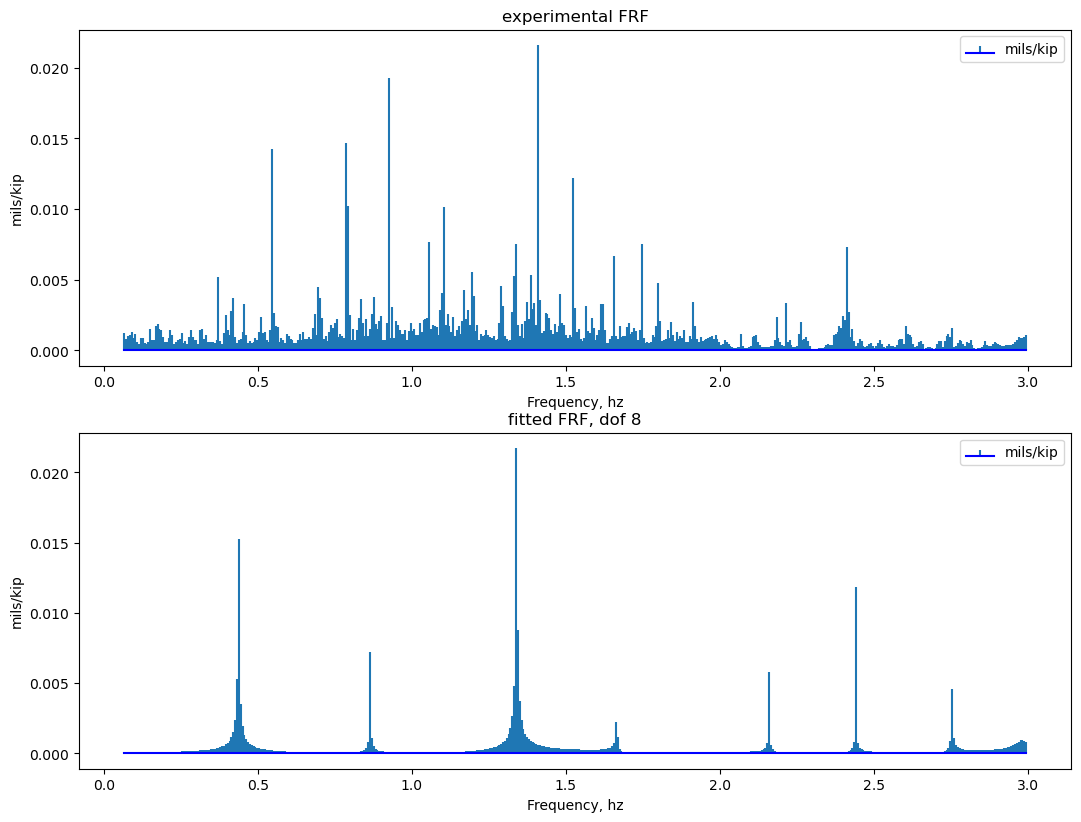

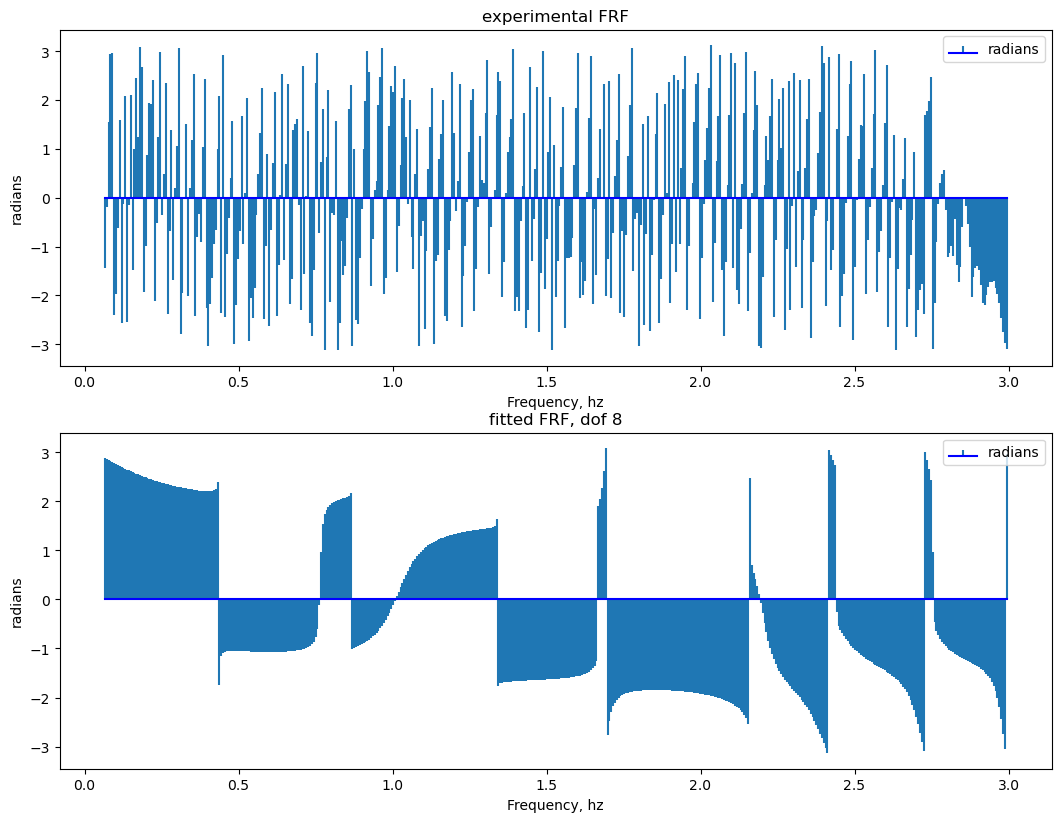

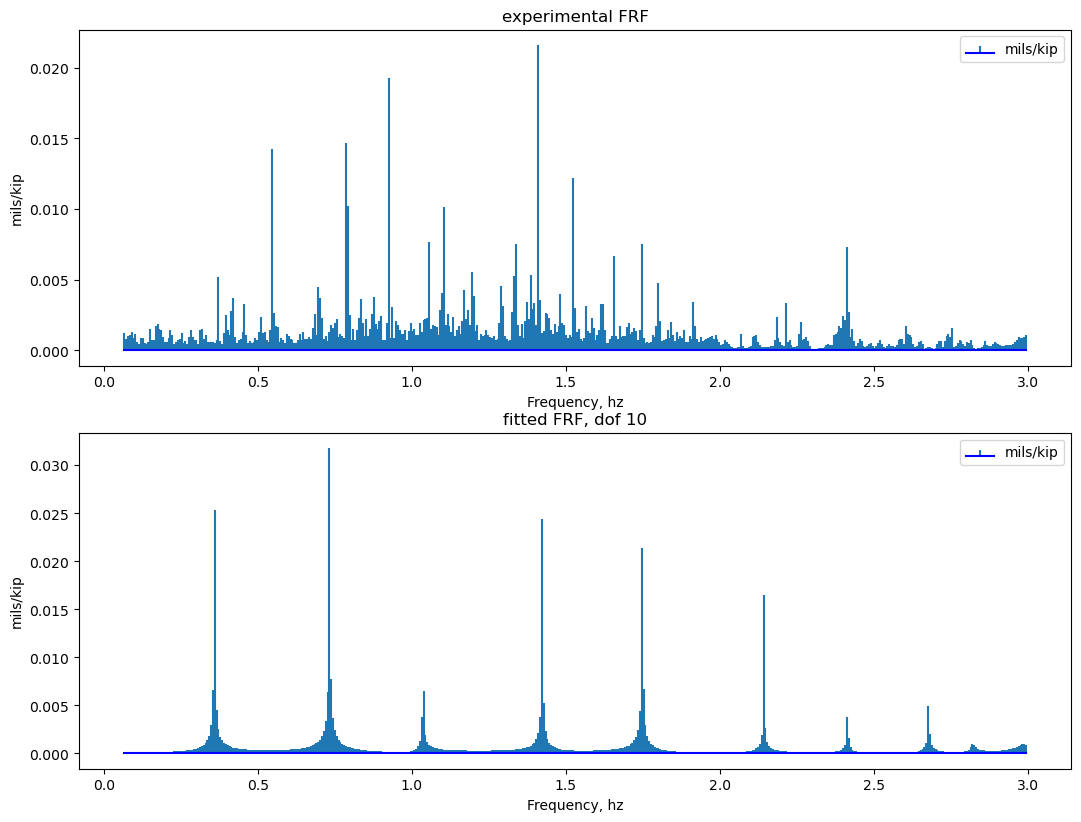

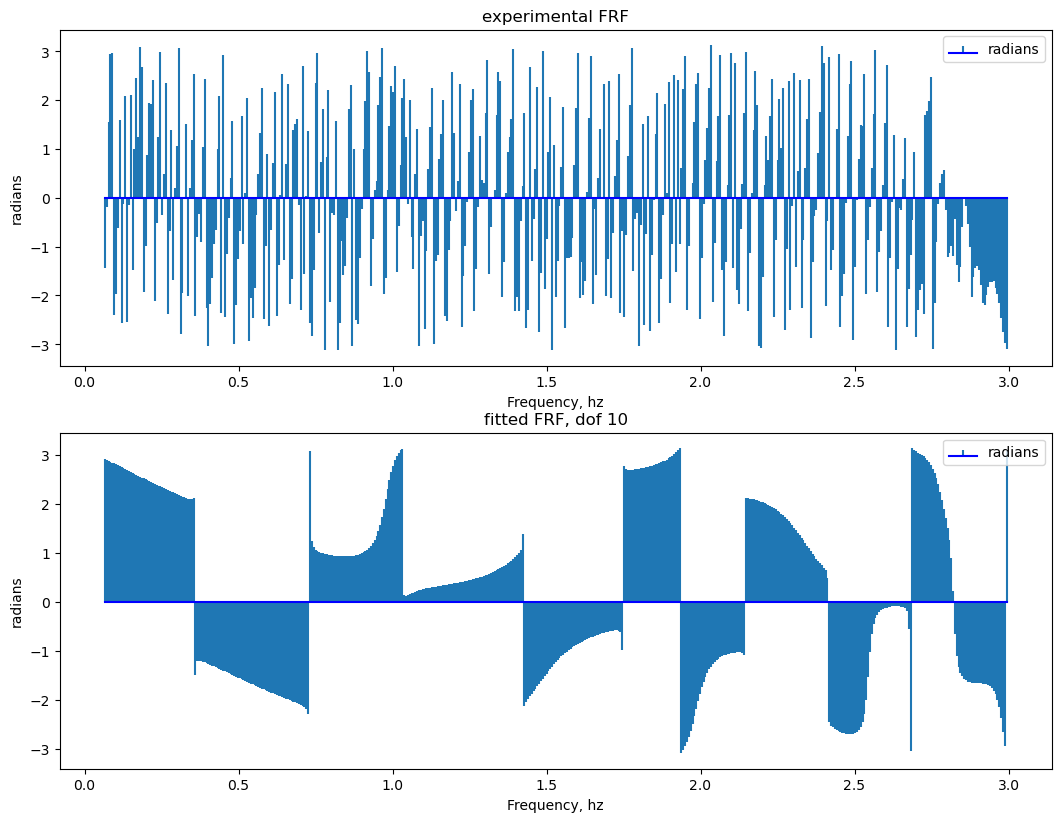

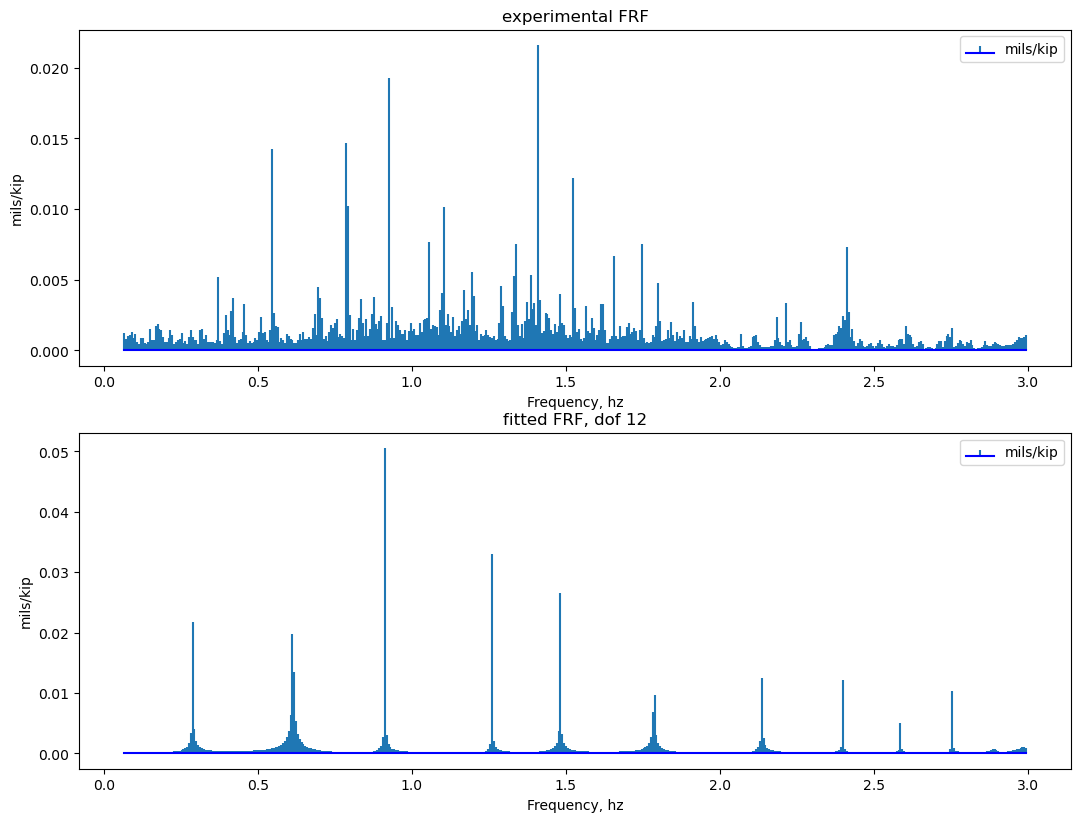

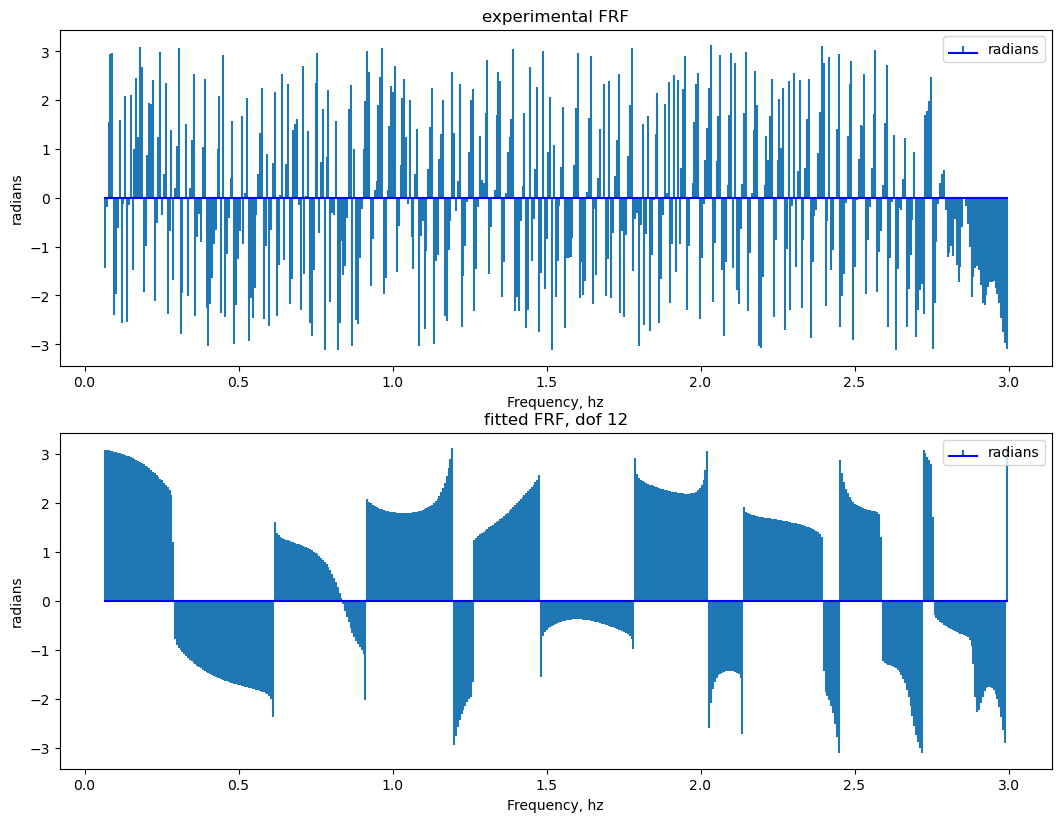

Disp1 [-0.06945449127851792, -0.09500259863322486, -0.12654778983261364]


In [4]:
    print('Calculating Disp1 for dof', a_dof)
    for n_dof in a_dof:
        #print('Disp1')
        a_wz_1.append(-get_wz(h1_1, a_f, N, n_dof, imin, imax, 1))
    a_wz.append(a_wz_1)
    print('Disp1', a_wz_1)


In [5]:
    print('Calculating Disp2 for dof', a_dof)
    for n_dof in a_dof:
        a_wz_2.append(-get_wz(h1_2, a_f, N, n_dof, imin, imax))
    a_wz.append(a_wz_2)
    print('Disp2', a_wz_2)


Calculating Disp2 for dof [8, 10, 12]
Disp2 [-0.05884667416384905, -0.059650812086819036, -0.11143294568116585]


In [6]:
    print('Calculating Disp3 for dof', a_dof)
    for n_dof in a_dof:
        a_wz_3.append(-get_wz(h1_3, a_f, N, n_dof, imin, imax))
    a_wz.append(a_wz_3)
    print('Disp3', a_wz_3)


Calculating Disp3 for dof [8, 10, 12]
Disp3 [-0.04704679883455414, -0.049975415938838766, -0.0780808167516899]


In [7]:
    print('Calculating Disp4 for dof', a_dof)
    for n_dof in a_dof:
        a_wz_4.append(-get_wz(h1_4, a_f, N, n_dof, imin, imax))
    a_wz.append(a_wz_4)
    print('Disp4', a_wz_4)


Calculating Disp4 for dof [8, 10, 12]
Disp4 [-0.0390814577195884, -0.06472079336929333, -0.08725235053777158]


In [8]:
    print('Calculating Disp5 for dof', a_dof)
    for n_dof in a_dof:
        a_wz_5.append(-get_wz(h1_5, a_f, N, n_dof, imin, imax))
    a_wz.append(a_wz_5)
    print('Disp5', a_wz_5)


Calculating Disp5 for dof [8, 10, 12]
Disp5 [-0.04046423730084539, -0.08113411304730403, -0.10812450691884637]


In [9]:
    print('Calculating Disp6 for dof', a_dof)
    for n_dof in a_dof:
        a_wz_6.append(-get_wz(h1_6, a_f, N, n_dof, imin, imax))
    a_wz.append(a_wz_6)
    print('Disp6', a_wz_6)


Calculating Disp6 for dof [8, 10, 12]
Disp6 [-0.01265727375185519, -0.020321971149714013, -0.03013241640265316]


x-inch [0, 12, 24, 36, 48, 60] wz mils/kip [-0.12654778983261364, -0.11143294568116585, -0.0780808167516899, -0.08725235053777158, -0.10812450691884637, -0.03013241640265316]


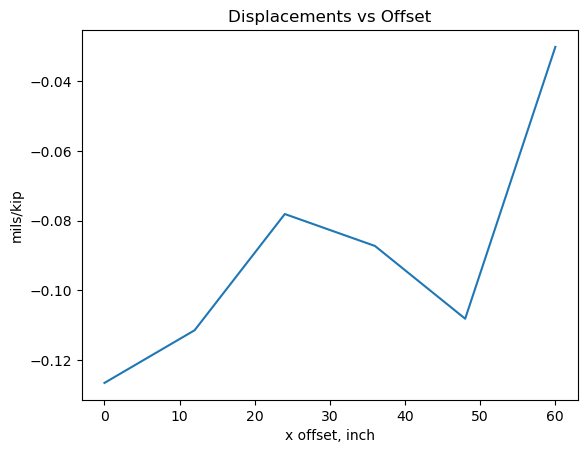

In [10]:
    print('x-inch', a_x, 'wz mils/kip', [min(wz) for wz in a_wz])
    plt.plot(a_x, [min(wz) for wz in a_wz])
    plt.title('Displacements vs Offset')
    plt.xlabel('x offset, inch')
    plt.ylabel('mils/kip')
    plt.show()